# Demo 3.1 Part 1: Vertical and Horizontal Bar Charts 

- **Vertical Bar Charts**    
- **Horizontal Bar Charts**  

**Key Steps:**:  
  1. Read data into a dataframe  
  2. Change Data Types as needed  
  3. Aggregate with *groupby()*: Group on a Single Column     
  4. Plot!  



Filename:  **Cars.csv** 

In [8]:
import sys 
!conda install --yes --prefix {sys.prefix} plotly 


Solving environment: ...working... done

# All requested packages already installed.



In [9]:
import pandas as pd
import plotly.express as px

# 1. Read the datafile into a dataframe  

In [10]:
#Read the excel file into a pandas dataframe
df = pd.read_excel("Data/w3schools_Data.xlsx","Orders",)

print(df.shape)
df.head()

(199, 5)


Orders Table  Unnamed: 1  Unnamed: 2  \
0  Note: This is not the same as the OrderDetails...         NaN         NaN   
1                                                NaN         NaN         NaN   
2                                            OrderID  CustomerID  EmployeeID   
3                                              10248          90           5   
4                                              10249          81           6   

            Unnamed: 3 Unnamed: 4  
0                  NaN        NaN  
1                  NaN        NaN  
2            OrderDate  ShipperID  
3  1996-07-04 00:00:00          3  
4  1996-07-05 00:00:00          1

# 2. Change data types as needed  
- If we want to do numeric calculations on a column it is important that pandas recognizes it as numeric. 
- We also want to make sure a column is a float (rather than integer) if needed.
- Otherwise either errors or weird results are going to happen!  


In [11]:
# data types 'Before' 
df.dtypes

Orders Table    object
Unnamed: 1      object
Unnamed: 2      object
Unnamed: 3      object
Unnamed: 4      object
dtype: object

In [12]:
# data types 'After' 
df.dtypes

Orders Table    object
Unnamed: 1      object
Unnamed: 2      object
Unnamed: 3      object
Unnamed: 4      object
dtype: object

# Question 1:  What is the Average City MPG By Vehicle Type?  
- Categorical Variable to Group On:  **Type**  
- Continuous Variable We're Interested In:  **MPG_City** 
- Aggregation Function:  **mean** 
 
- **Notes:**  
  - If we only select a single continuous variable/column we're interested in, groupby() will creat a pandas Data **Series** rather than a Dataframe  
  - Data Series are similar to Dataframes, but I think Dataframes are easier to work with and more familiar to you, so we're going to convert the Data Series to a Dataframe.


# 3. Aggregate the Data: Grouping On a Single Column 


In [13]:
# This groupby will create a pandas Series rather than a Dataframe
ser_cars_by_type = df.groupby("OrderID")['EmployeeID'].count()

ser_cars_by_type

KeyError: 'OrderID'

In [9]:
type(ser_cars_by_type)

pandas.core.series.Series

### Convert the Series to a Dataframe (and/or Move Index to Being a Column)  

In [10]:
df_cars_by_type = ser_cars_by_type.reset_index(inplace=False)

type(df_cars_by_type)

pandas.core.frame.DataFrame

In [11]:
print(df_cars_by_type.shape)
df_cars_by_type.head()

(6, 2)


Type   MPG_City
0  Hybrid  55.000000
1     SUV  16.100000
2   Sedan  21.083969
3  Sports  18.408163
4   Truck  16.500000

# 4a. Plot: Vertical Bar Chart   

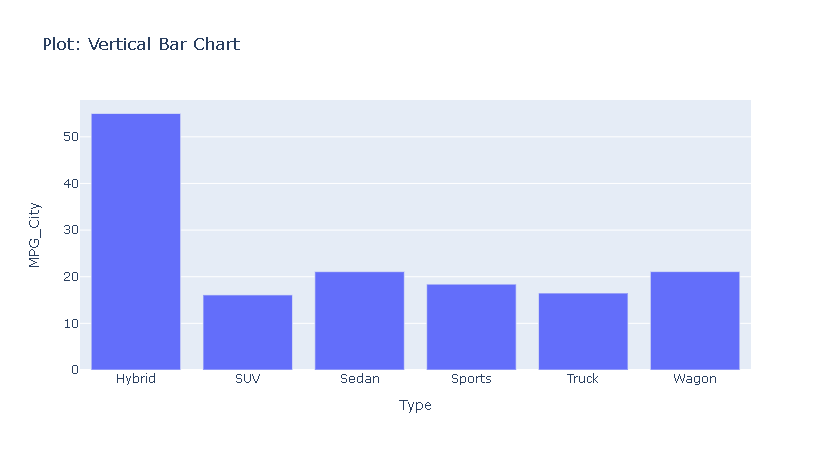

In [12]:
fig = px.bar(df_cars_by_type,              
             x='Type', 
             y='MPG_City',
             #template='plotly_dark',
             title='Plot: Vertical Bar Chart')
fig.show()

# 4.b Plot: Horizontal Bar Chart   
- **Note:**  When you sort the Dataframe to change the order of the Bars, the Horizontal Bar chart needs to be sorted the opposite way you probably expect!

In [13]:
fig = px.bar(df_cars_by_type,              
             x='MPG_City', 
             y='Type',
             orientation='h',
             title='Plot: Horizontal Bar Chart')
fig.show()